In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from fastbook import *
from fastai.tabular.all import *
from dtreeviz.trees import * 
from dateutil import parser
 
pd.options.display.max_rows = 20
pd.options.display.max_columns = 8



In [2]:
path = Path('../../..')
Path.BASE_PATH = path


In [3]:
wdf_2016 = pd.read_csv(path/'data/processed/Onsite-MetMast-SCADA-data-2016.csv', low_memory = False)
wdf_2017 = pd.read_csv(path/'data/processed/Onsite-MetMast-SCADA-data-2017.csv', low_memory=False)
tdf_2016 = pd.read_csv(path/'data/processed/Wind-Turbine-SCADA-signals-2016.csv',low_memory = False)
tdf_2017 = pd.read_csv(path/'data/processed/Wind-Turbine-SCADA-signals-2017_0.csv', low_memory=False)

df_2016 = pd.merge(wdf_2016, tdf_2016, on='Timestamp', how='outer')
df_2017 = pd.merge(wdf_2017, tdf_2017, on='Timestamp', how='outer')

# Using pandas boolean indexing to create new dataframe where Turbine ID = T07
df_2016_T07 = df_2016[df_2016['Turbine_ID']=='T07'].copy().reset_index(drop=True)
df_2017_T07 = df_2017[df_2017['Turbine_ID']=='T07'].copy().reset_index(drop=True)

In [4]:
df_2017_T07.head()

,Unnamed: 0_x,Timestamp,Min_Windspeed1,Max_Windspeed1,...,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,24354.0,2017-01-01T00:00:00+00:00,6.4,9.5,...,1000.0,0.0,37.0,90.8
1,20618.0,2017-01-01T00:10:00+00:00,5.7,10.3,...,1000.0,0.0,37.0,91.1
2,34569.0,2017-01-01T00:20:00+00:00,5.6,9.9,...,1000.0,0.0,37.0,97.4
3,5408.0,2017-01-01T00:30:00+00:00,4.8,11.6,...,1000.0,0.0,37.0,104.4
4,27202.0,2017-01-01T00:40:00+00:00,3.3,9.8,...,642.2,61.1,37.0,104.4


In [5]:
df_2017_T07_copy = df_2017_T07.copy()

In [ ]:
m = load_pickle(path/'models/final_model.pkl') # random forest model finished training
valid_xs_final = load_pickle(path/'models/final_data_val.pkl') #validation set after datacleaning (haven't removed faulty sensordata)
xs_final = load_pickle(path/'models/final_data_train.pkl') # training set after datacleaning (haven't removed faulty sensordata)

In [7]:
dep_var = 'Gen_Bear_Temp_Avg'

In [8]:
y_train = df_2016_T07[dep_var][:34613]
y_val = df_2016_T07[dep_var][34613:]
y_test = df_2017_T07[dep_var]

In [9]:
df_2016_T07['Timestamp'] = df_2016_T07['Timestamp'].apply(parser.parse)
df_2017_T07_copy['Timestamp'] = df_2017_T07_copy['Timestamp'].apply(parser.parse)

### Plot actual, and prediction for validation set

(17832,)

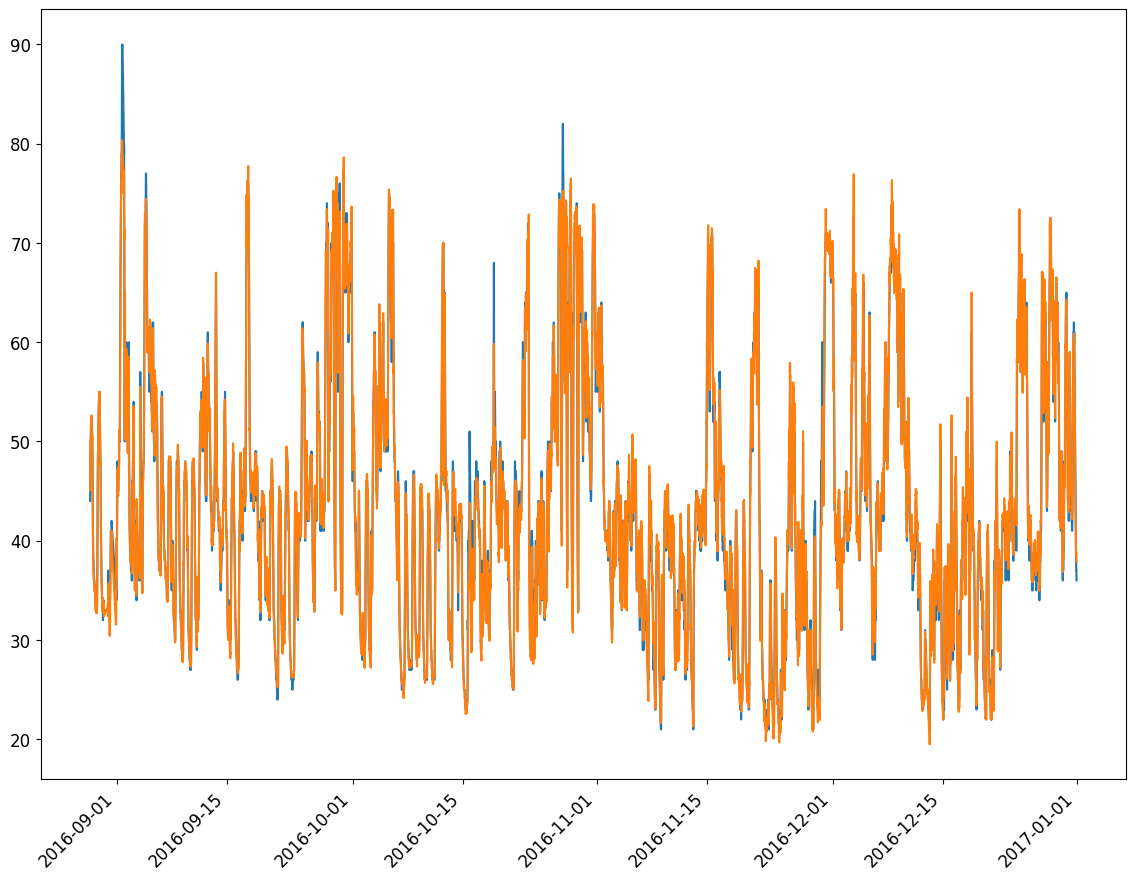

In [10]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45, ha='right')
plt.plot(df_2016_T07['Timestamp'][34613:], y_val)
plt.plot(df_2016_T07['Timestamp'][34613:],m.predict(valid_xs_final))

m.predict(valid_xs_final).shape

### Plot actual, and prediction for training set

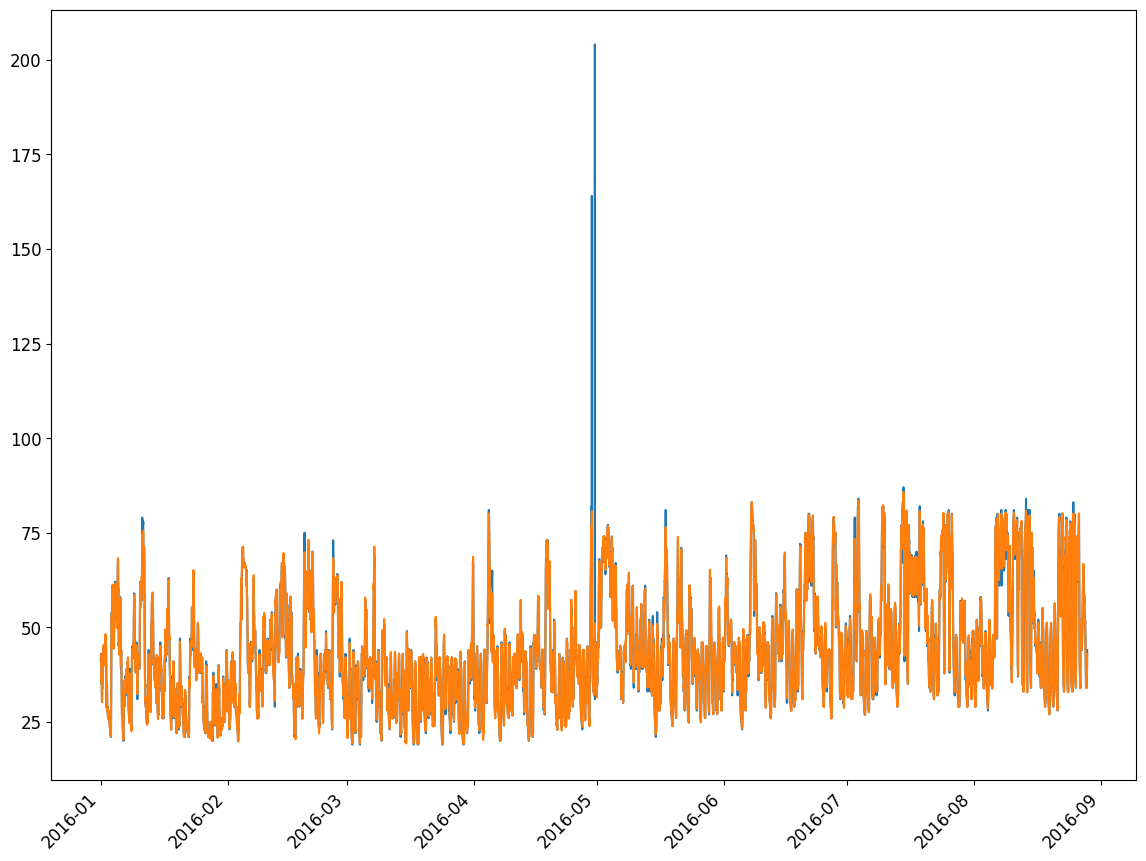

In [11]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45, ha='right')
plt.plot(df_2016_T07['Timestamp'][:34613], y_train)
plt.plot(df_2016_T07['Timestamp'][:34613],m.predict(xs_final))

### as we can see, we should clean the faulty sensor data

## Let's predict the test 2017 data now..

In [12]:
xs_final.columns

Index(['Gen_Bear2_Temp_Avg', 'Gen_Phase1_Temp_Avg', 'Grd_Busbar_Temp_Avg',
       'Cont_VCP_ChokcoilTemp_Avg', 'Gear_Oil_Temp_Avg',
       'HVTrafo_Phase2_Temp_Avg', 'Gen_SlipRing_Temp_Avg', 'Cont_Top_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg'],
      dtype='object')

In [13]:
#TODO: pass through TabularPandas instead of manually defining
indep_var = ['Gen_Bear2_Temp_Avg', 'Gen_Phase1_Temp_Avg', 'Grd_Busbar_Temp_Avg',
       'Cont_VCP_ChokcoilTemp_Avg', 'Gear_Oil_Temp_Avg',
       'HVTrafo_Phase2_Temp_Avg', 'Gen_SlipRing_Temp_Avg', 'Cont_Top_Temp_Avg',
       'HVTrafo_Phase3_Temp_Avg']

In [14]:
df_2017_T07 = df_2017_T07[indep_var]

In [15]:
xs_final.head(),df_2017_T07.head(),df_2017_T07_copy.head()

(   Gen_Bear2_Temp_Avg  Gen_Phase1_Temp_Avg  Grd_Busbar_Temp_Avg  \
 0                39.0                 62.0                 36.0   
 1                39.0                 62.0                 36.0   
 2                39.0                 62.0                 36.0   
 3                39.0                 63.0                 36.0   
 4                40.0                 63.0                 36.0   
 
    Cont_VCP_ChokcoilTemp_Avg  ...  HVTrafo_Phase2_Temp_Avg  \
 0                       91.0  ...                     75.0   
 1                       92.0  ...                     75.0   
 2                       92.0  ...                     75.0   
 3                       92.0  ...                     75.0   
 4                       93.0  ...                     75.0   
 
    Gen_SlipRing_Temp_Avg  Cont_Top_Temp_Avg  HVTrafo_Phase3_Temp_Avg  
 0                   26.0               38.0                     75.0  
 1                   26.0               38.0                     7

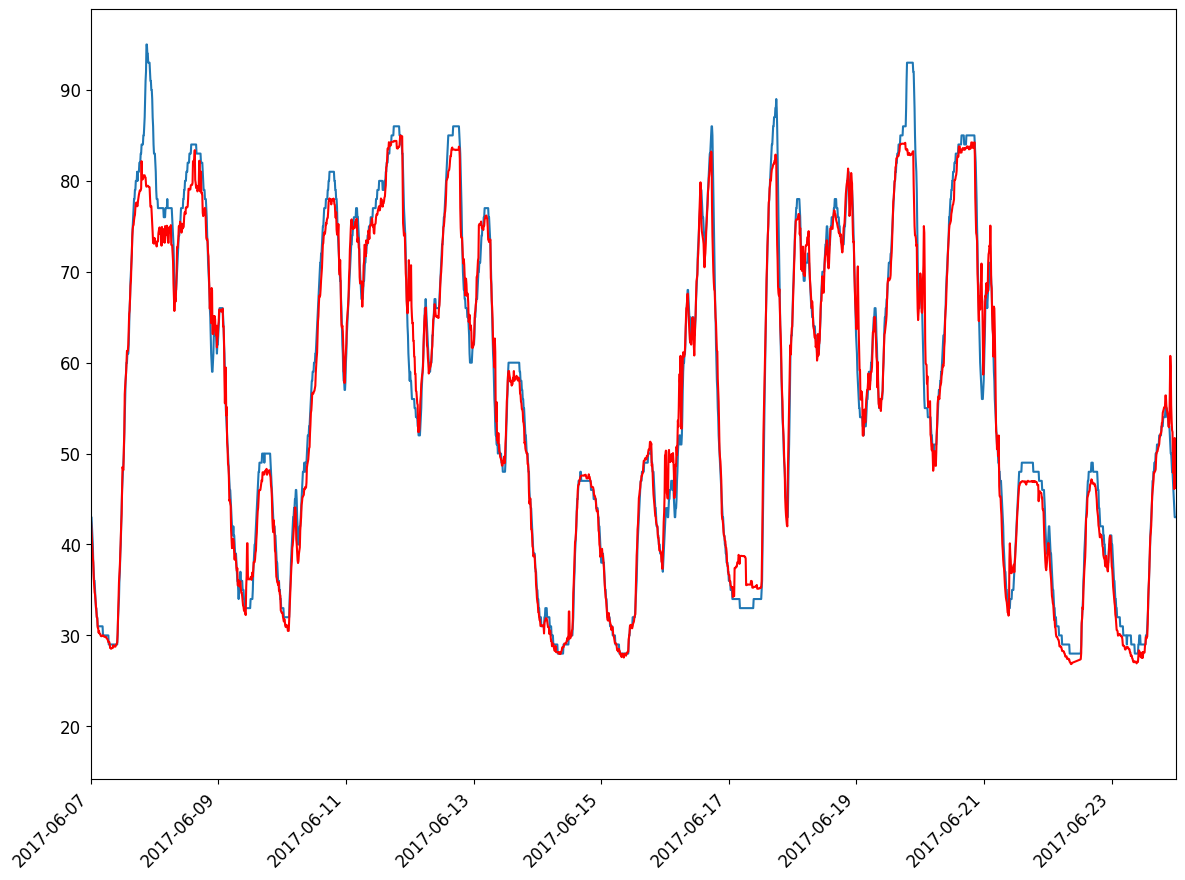

In [16]:
plt.figure(figsize=(14,10))
plt.xticks(rotation=45, ha='right')
plt.xlim(pd.Timestamp('2017-06-07'), pd.Timestamp('2017-06-24'))
plt.plot(df_2017_T07_copy['Timestamp'][:52294],y_test[:52294])
plt.plot(df_2017_T07_copy['Timestamp'][:52294],m.predict(df_2017_T07), color='r')